# 対応のないT検定
用途としては違う集団で似た性質か違う性質かを検定する。今回は機械学習用データセットで異なるクラスでどのようになるかを検定して分布を確認する。具体的にはデータセットのクラスごとに有意確率を求めてクラスごとに特徴量の分布の違いの度合いを計算する。ここで、特徴量はp値の値が低いほど異なる分布をしていると考えられる。

#ライブラリのインポート

In [ ]:
import pandas as pd
import scipy.stats as stats
import scipy as sp

# データの読み込みとクラス別にデータフレームを分ける

In [ ]:
df = pd.read_csv("iris.csv")
df0 = df[df["category"]==0]
df1 = df[df["category"]==1]
df2 = df[df["category"]==2]

In [ ]:
print("カテゴリ0とカテゴリ1の比較")
for col in df.columns:
    x0 = df0[col].values
    x1 = df1[col].values
    t, p = stats.ttest_ind(x0, x1, equal_var=True)
    MU = abs(x0.mean() - x1.mean())
    SE = MU / t
    DF = len(x0) - 1 + len(x1) - 1
    CI = stats.t.interval(alpha=0.95, loc=MU, scale=SE, df=DF)
    print("項目名:"+col)
    print("p値:"+str(p))
    print("平均値の差:"+str(MU))
    print("差の標準偏差"+str(SE))
    print()

カテゴリ0とカテゴリ1の比較
項目名:category
p値:0.0
平均値の差:1.0
差の標準偏差-0.0

項目名:sepal length (cm)
p値:8.985235037487077e-18
平均値の差:0.9299999999999997
差の標準偏差-0.08839475466938762

項目名:sepal width (cm)
p値:4.362239016010214e-15
平均値の差:0.6479999999999997
差の標準偏差0.06980673027607534

項目名:petal length (cm)
p値:5.717463758170621e-62
平均値の差:2.796
差の標準偏差-0.0708410119887614

項目名:petal width (cm)
p値:4.589080615710866e-56
平均値の差:1.0819999999999999
差の標準偏差-0.03181194744117374



C:\Users\decar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1910: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
C:\Users\decar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1911: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


In [ ]:
print("カテゴリ1とカテゴリ2の比較")
for col in df.columns:
    x1 = df1[col].values
    x2 = df2[col].values
    t, p = stats.ttest_ind(x1, x2, equal_var=True)
    MU = abs(x1.mean() - x2.mean())
    SE = MU / t
    DF = len(x1) - 1 + len(x2) - 1
    CI = stats.t.interval(alpha=0.95, loc=MU, scale=SE, df=DF)
    print("項目名:"+col)
    print("p値:"+str(p))
    print("平均値の差:"+str(MU))
    print("差の標準偏差"+str(SE))
    print()

カテゴリ1とカテゴリ2の比較
項目名:category
p値:0.0
平均値の差:1.0
差の標準偏差-0.0

項目名:sepal length (cm)
p値:1.7248563024547942e-07
平均値の差:0.6519999999999984
差の標準偏差-0.11582534353103226

項目名:sepal width (cm)
p値:0.0018191004238894803
平均値の差:0.20399999999999974
差の標準偏差-0.06363544128671618

項目名:petal length (cm)
p値:3.1788195478061495e-22
平均値の差:1.2920000000000007
差の標準偏差-0.10250893440404629

項目名:petal width (cm)
p値:2.2304090710248333e-26
平均値の差:0.7000000000000004
差の標準偏差-0.047862046657075594



In [ ]:
print("カテゴリ2とカテゴリ0の比較")
for col in df.columns:
    x2 = df2[col].values
    x0 = df0[col].values
    t, p = stats.ttest_ind(x2, x0, equal_var=True)
    MU = abs(x2.mean() - x0.mean())
    SE = MU / t
    DF = len(x2) - 1  + len(x0) - 1
    CI = stats.t.interval(alpha=0.95, loc=MU, scale=SE, df=DF)
    print("項目名:"+col)
    print("p値:"+str(p))
    print("平均値の差:"+str(MU))
    print("差の標準偏差"+str(SE))
    print()

カテゴリ2とカテゴリ0の比較
項目名:category
p値:0.0
平均値の差:2.0
差の標準偏差0.0

項目名:sepal length (cm)
p値:6.892546060674059e-28
平均値の差:1.581999999999998
差の標準偏差0.10281943753344443

項目名:sepal width (cm)
p値:8.916634067006443e-09
平均値の差:0.44399999999999995
差の標準偏差-0.07059513771774764

項目名:petal length (cm)
p値:1.5641224158883576e-71
平均値の差:4.088000000000001
差の標準偏差0.08181612036157916

項目名:petal width (cm)
p値:3.582719502316063e-65
平均値の差:1.7820000000000003
差の標準偏差0.04169569057162739



# 決定木を用いて重要度と共に比較する

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
y_name = "category"
y_table = df[y_name]
y = y_table.values
x_table = df.drop(y_name, axis=1)
x_name = x_table.columns
x = x_table.values

In [ ]:
model = DTC()
model.fit(x, y)
imp = []
imp.append(model.feature_importances_)
dfi = pd.DataFrame(imp)
dfi.columns = x_name
dfi

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.013333,0.0,0.064056,0.922611


# 項目ごとに分布を可視化

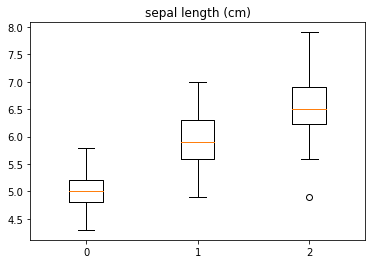

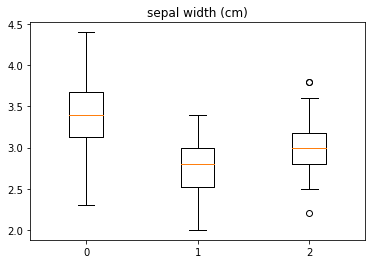

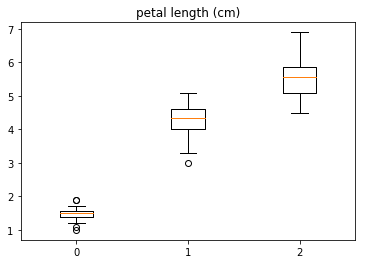

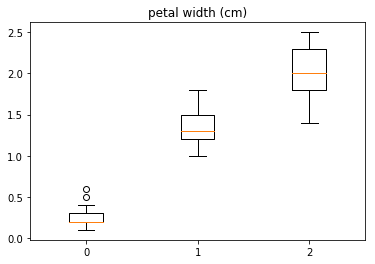

In [ ]:
import matplotlib.pyplot as plt
for col in x_table.columns:
    x0 = df0[col].values
    x1 = df1[col].values
    x2 = df2[col].values
    data = (x0, x1, x2)
    plt.boxplot(data, labels=["0", "1", "2"])
    plt.title(col)
    plt.show()